In [1]:
import rebound
import numpy as np

In [2]:
sa = rebound.SimulationArchive("u_And_Forwards.bin")

/rds/general/user/wc421/home/anaconda3/envs/test1/lib/python3.9/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)


In [3]:
len(sa)

1531

In [4]:
max_time = sa.tmax/(2*np.pi)

In [8]:
Noutputs = len(sa)
x = np.zeros((6,Noutputs))
y = np.zeros((6,Noutputs))
z = np.zeros((6,Noutputs))
time = []

for i,sims in enumerate(sa): 
    sims.move_to_com()
    com = sims.calculate_com()
    time.append(sims.t/(2*np.pi))
    x[0][i] = sims.particles[0].x   # This stores the data which allows us to plot it later
    y[0][i] = sims.particles[0].y
    z[0][i] = sims.particles[0].z
    x[1][i] = sims.particles[1].x
    y[1][i] = sims.particles[1].y
    z[1][i] = sims.particles[1].z
    x[2][i] = sims.particles[2].x
    y[2][i] = sims.particles[2].y
    z[2][i] = sims.particles[2].z
    x[3][i] = sims.particles[3].x
    y[3][i] = sims.particles[3].y
    z[3][i] = sims.particles[3].z
    x[4][i] = sims.particles[4].x
    y[4][i] = sims.particles[4].y
    z[4][i] = sims.particles[4].z
    x[5][i] = com.x
    y[5][i] = com.y
    z[5][i] = com.z



Text(0.5, 1.0, 'u And Star System Track over 1530000 years')

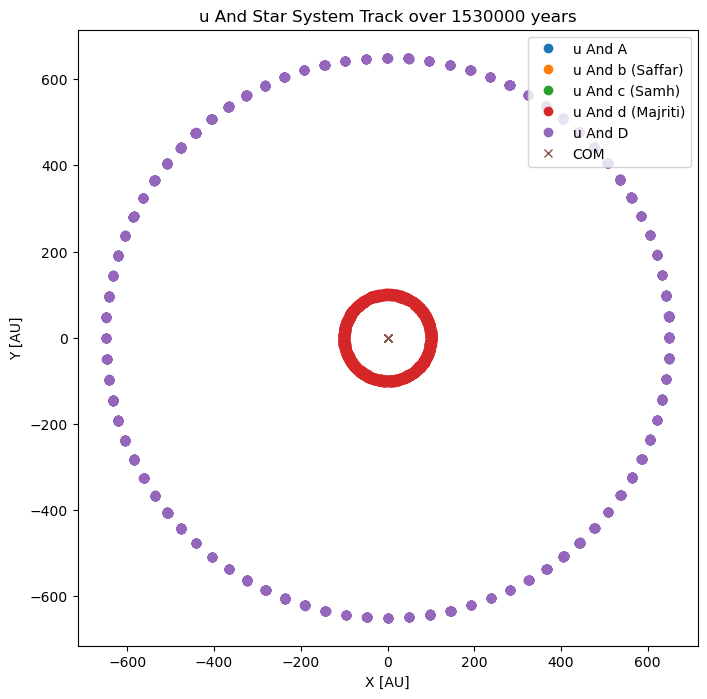

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
#ax.set_xlim([-6,6])
#ax.set_ylim([-6,6])
plt.plot(x[0], y[0],"o",label = "u And A");
plt.plot(x[1], y[1],"o",label = "u And b (Saffar)");
plt.plot(x[2], y[2],"o",label = "u And c (Samh)");
plt.plot(x[3], y[3],"o",label = "u And d (Majriti)");
#plt.plot(x[4], y[4],"o",label = "u And D");
plt.plot(x[5], y[5],"x",label = "COM");
#plt.xlim(2400,2425)
#plt.ylim(-1470,-1460)
plt.xlabel("X [AU]")
plt.ylabel("Y [AU]")

#fit,cov = np.polyfit(x[2][3700:4459],y[2][3700:4459],1,cov=True)
#TFit = np.poly1d(fit)
#plt.plot(x[2],TFit(x[2]),color="red")

plt.legend()

plt.title("u And Star System Track over %.f years"%max_time)
#plt.savefig("u And Star System Track.png",dpi=300)

In [7]:
sa[18].particles[4].a

/rds/general/user/wc421/home/anaconda3/envs/test1/lib/python3.9/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)


749.9999899063804

In [18]:
sa.tmax/(2*np.pi)

1223000.0000718432

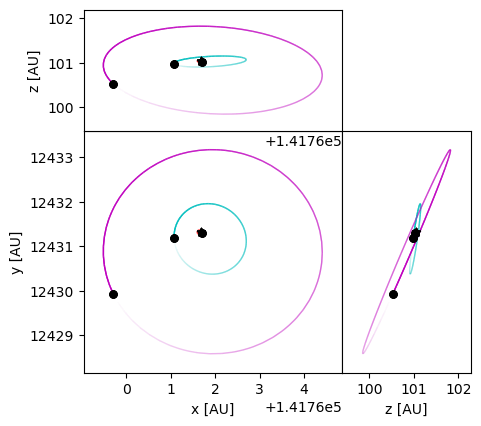

In [19]:

fig = rebound.OrbitPlotSet(sa[len(sa)-1], unitlabel="[AU]",particles = [1,2,3],color=True)
#fig.fig.savefig("u_And.png",dpi=300)

Text(0.5, 0, 'Time [Yr]')

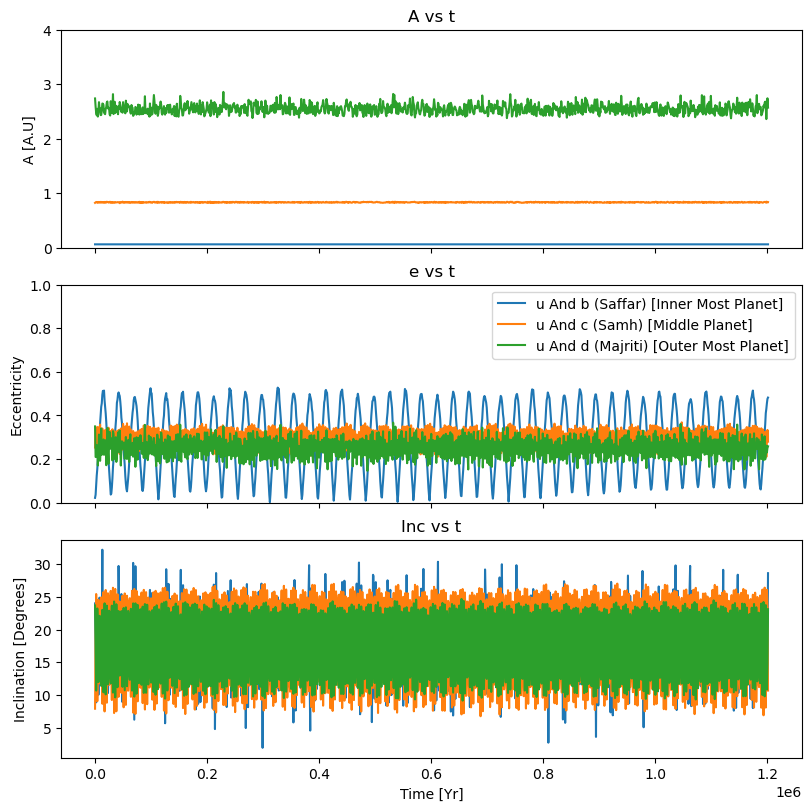

In [10]:
import matplotlib.pyplot as plt



time = []
e = []
a = []
inc = []

e2 = []
a2 = []
inc2 = []

e3 = []
a3 = []
inc3 = []

for i,sims in enumerate(sa): 
    time.append(sims.t/(2*np.pi))
    
    e.append(sims.particles[1].calculate_orbit(primary=sims.particles[0]).e)
    a.append(sims.particles[1].calculate_orbit(primary=sims.particles[0]).a)
    inc.append((sims.particles[1].calculate_orbit(primary=sims.particles[0]).inc)*180/np.pi)

    e2.append(sims.particles[2].calculate_orbit(primary=sims.particles[0]).e)
    a2.append(sims.particles[2].calculate_orbit(primary=sims.particles[0]).a)
    inc2.append((sims.particles[2].calculate_orbit(primary=sims.particles[0]).inc)*180/np.pi)
    
    e3.append(sims.particles[3].calculate_orbit(primary=sims.particles[0]).e)
    a3.append(sims.particles[3].calculate_orbit(primary=sims.particles[0]).a)
    inc3.append((sims.particles[3].calculate_orbit(primary=sims.particles[0]).inc)*180/np.pi)
    

f, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(8,8), sharex=True,layout='constrained')

ax1.plot(time, a)
ax1.plot(time, a2)
ax1.plot(time, a3)


ax1.set_ylim(0,4)
ax1.set_ylabel("A [A.U]")
ax1.set_title('A vs t')
ax1.ticklabel_format(useOffset=False)

ax2.set_title('e vs t')

ax2.plot(time, e,label = "u And b (Saffar) [Inner Most Planet]")
ax2.plot(time, e2,label = "u And c (Samh) [Middle Planet]")
ax2.plot(time, e3,label = "u And d (Majriti) [Outer Most Planet]")
ax2.legend()

ax2.set_ylabel("Eccentricity")
ax2.set_ylim(0,1)

ax3.plot(time, inc)
ax3.plot(time, inc2)
ax3.plot(time, inc3)

#ax3.set_ylim(0,1)
ax3.set_ylabel("Inclination [Degrees]")
ax3.set_title('Inc vs t')

plt.xlabel("Time [Yr]")

#plt.gca().invert_xaxis()

#plt.ticklabel_format(useOffset=False)

#plt.savefig("Plots.png",dpi=300)

Text(0.5, 1.0, 'Changes in dt as the simulation runs')

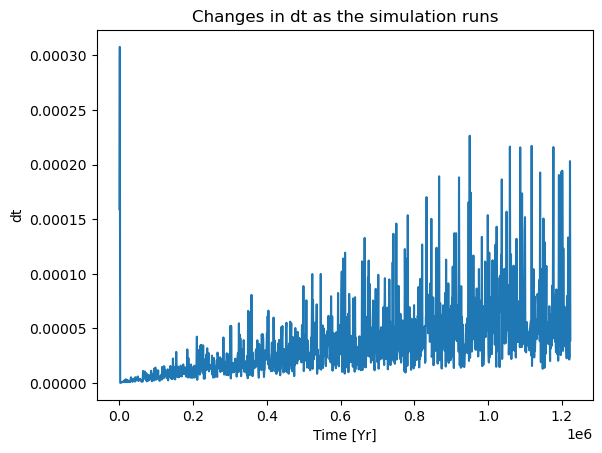

In [20]:
time = []
dt = []
for i,sims in enumerate(sa): 
    time.append(sims.t/(2*np.pi))
    dt.append(sims.dt/(2*np.pi))

plt.plot(time,dt)
plt.ylabel("dt")
plt.xlabel("Time [Yr]")
plt.ticklabel_format(useOffset=False)

#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
#plt.ylim(0,1)

plt.title("Changes in dt as the simulation runs")
#plt.savefig("dt.png",dpi=300)

In [12]:
min(dt)

1.7499495094251375e-07

(-0.2, 0.0)

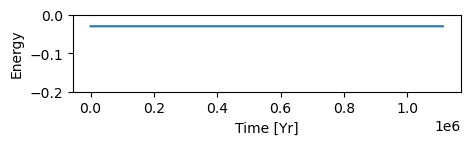

In [13]:
energy = []
for i,sims in enumerate(sa): 
    energy.append(sims.energy())
plt.figure(figsize=(5,1))
plt.plot(time,energy)
plt.ylabel("Energy")
plt.xlabel("Time [Yr]")
plt.ticklabel_format(useOffset=False)
plt.ylim(-0.2,0)
#plt.savefig("E.png",dpi=300)

In [20]:
(sa[1].t-sa[0].t)/(2*np.pi)

1000.0000260736516

In [23]:
name

'Stability_Test_2.39AU.bin'

In [32]:
sa[17].walltime/(60**2 * 24)

4.459393638348468